<img src="./../res/logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales 

# Tarea Semanal Nº3
#### Alumno: Mauro Fernández

# 1. Consigna

Diseñar un bloque cuantizador que opere sobre una señal discreta en tiempo **S<sub>R</sub>**, de forma tal que para un ADC de **B** bits y rango **±V<sub>F</sub>**, el operador:

\begin{equation}
s_Q = \mathop{Q}_{B,V_F}  \{s_R\}
\end{equation}

generará una **S<sub>Q</sub>** comprendida entre **±V<sub>F</sub>** y con valores discretos establecidos por el paso de cuantización: 

\begin{equation} 
q = \frac{2.V_F}{2^B - 1} \approx \frac{V_F}{2^{B-1}}
\end{equation}

\begin{equation} 
[q] = [Volts]
\end{equation}

Visualice en una misma gráfica **S<sub>R</sub>** y **S<sub>Q</sub>**, donde se pueda observar que tienen **el mismo rango** en Volts y el efecto de la cuantización para **V<sub>F</sub>** = 2 Volts y  **B** = 4, 8 y 16 bits.

Para validar el funcionamiento del cuantizador se propone utilizar como entrada una señal senoidal generada con los siguientes parámetros:

* frecuencia **f<sub>0</sub>** arbitraria, por ejemplo **f<sub>0</sub>** = **f<sub>S</sub>** / **N** = **Δ<sub>f</sub>**
* Amplitud normalizada, es decir unitaria

**Bonus**: 
* Analizar la señal de error **e** = **S<sub>Q</sub>** − **S<sub>R</sub>** verificando las descripciones estadísticas vistas en teoría (Distribución uniforme, media, varianza, incorrelación)

# 2. Resolución
En la siguiente sección se implementa el cuantizador solicitado.
## 2.1. Bloque cuantizador

In [19]:
import numpy as np

def mi_cuantizador(sr,B,VF):
    """Cuantiza una señal discreta recibida como parámetro utilizando B bits en el rango VF
    
    Args:
        sr (float[nn]): señal a cuantizar, una matriz (Nx1) de números reales. 
        B  (int):       cantidad de Bits a utilizar para la cuantización
        VF (float):     valor absoluto del máximo valor del rango de amplitudes de la señal a cuantizar

    Returns:
        sq (float[nn]): señal cuantizada
    """
    # Calculamos paso de cuantización
    q = VF / (2**(B-1))
        
    # Calculamos cantidad de valores discretos
    N = (2**B)
        
    # Generamos la base de cuantización hasta N+1
    qq = np.linspace(-VF, VF, N+1, endpoint=True)
    
    # Obtenemos el valor medio entre cada rango discreto
    mm = (qq[1:] + qq[:-1])/2.0

    # Obtenemos el indice asociado a la base de cuantización
    idx = np.digitize(sr, mm)
    
    # Obtenemos el valor mas proximo cuantizado al de la señal
    sq = qq[idx]
    
    return sq

# 3. Implementación
En la siguiente sección se genera la señal senoidal que será cuantizada y se prueban diferentes configuraciones para validar el efecto de cuantización.


## 3.1. Inicialización

In [20]:
# Importamos desde biblioteca PDS generadores de señales realizados previamente 
from pds import mi_funcion_sen

# Importamos biblioteca para gráficos
import matplotlib.pyplot as plt
import matplotlib as mpl

# Configuración del tamaño de fuente
fig_font_size = 14
plt.rcParams.update({'font.size':fig_font_size})

# Configuración del tamaño de los gráficos
mpl.rcParams['figure.figsize'] = (11,7)

## 3.2. Generación de la señal senoidal

In [21]:
# Definimos parámetros de la señal senoidal
vmax = 1    # Amplitud [V]
dc   = 0    # Valor Medio [V]
ph   = 0    # Fase [rad]
N    = 1000 # N° muestras ADC
fs   = 1000 # Frecuencia de muestreo ADC [Hz] 
f0   = fs/N # Frecuencia [Hz]

# Generamos señal utilizando los parámetros definidos
tt, sr = mi_funcion_sen(vmax, dc, f0, ph, N, fs)

## 3.3. Cuantización de la señal senoidal (4 bits)

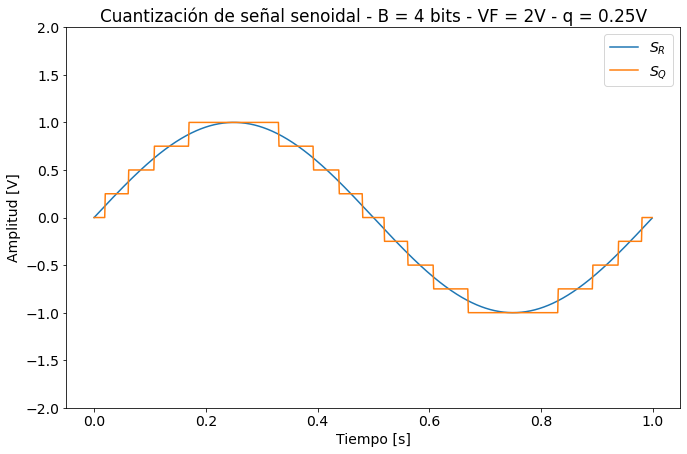

In [22]:
# Definimos parámetros de cuantización 1
B_1  = 4 # Cantidad de bits del ADC
VF_1 = 2 # Valor absoluto del valor máximo del rango [V]

# Calculamos paso de cuantización
q_1 = VF_1 / (2**(B_1-1))

# Generamos señal cuantizada
sq_1 = mi_cuantizador(sr,B_1,VF_1)

# Graficación de señal senoidal y su cuantización en el dominio del tiempo
plt.figure(1)
plt.plot(tt, sr, label='$S_R$')
plt.plot(tt, sq_1, label='$S_Q$')
plt.title('Cuantización de señal senoidal - B = {} bits - VF = {}V - q = {}V'.format(B_1,VF_1,q_1))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.ylim(-2,2)
plt.legend()
plt.show()

## 3.4. Cuantización de la señal senoidal (8 bits)

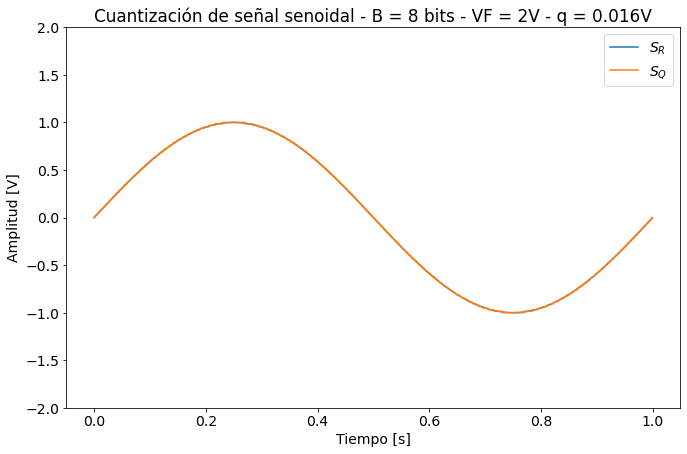

In [23]:
# Definimos parámetros de cuantización 2
B_2  = 8 # Cantidad de bits del ADC
VF_2 = 2 # Valor absoluto del valor máximo del rango [V]

# Calculamos paso de cuantización
q_2 = VF_2 / (2**(B_2-1))

# Generamos señal cuantizada
sq_2 = mi_cuantizador(sr,B_2,VF_2)

# Graficación de señal senoidal y su cuantización en el dominio del tiempo
plt.figure(2)
plt.plot(tt, sr, label='$S_R$')
plt.plot(tt, sq_2, label='$S_Q$')
plt.title('Cuantización de señal senoidal - B = {} bits - VF = {}V - q = {:.3f}V'.format(B_2,VF_2,q_2))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.ylim(-2,2)
plt.legend()
plt.show()

## 3.5. Cuantización de la señal senoidal (16 bits)

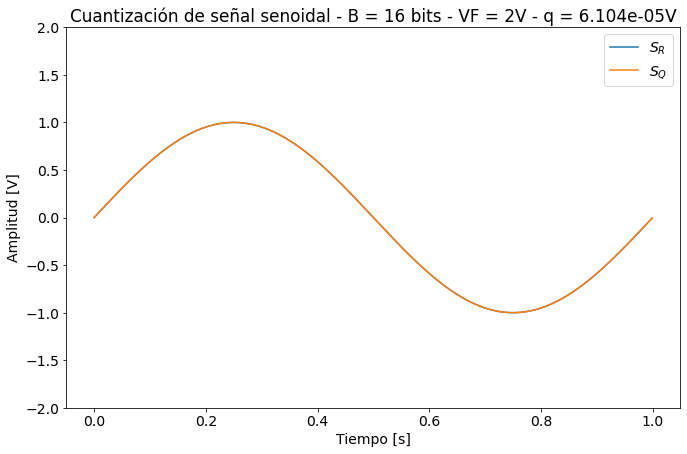

In [24]:
# Definimos parámetros de cuantización 3
B_3  = 16 # Cantidad de bits del ADC
VF_3 = 2 # Valor absoluto del valor máximo del rango [V]

# Calculamos paso de cuantización
q_3 = VF_3 / (2**(B_3-1))

# Generamos señal cuantizada
sq_3 = mi_cuantizador(sr,B_3,VF_3)

# Graficación de señal senoidal y su cuantización en el dominio del tiempo
plt.figure(3)
plt.plot(tt, sr, label='$S_R$')
plt.plot(tt, sq_3, label='$S_Q$')
plt.title('Cuantización de señal senoidal - B = {} bits - VF = {}V - q = {:.4g}V'.format(B_3,VF_3,q_3))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.ylim(-VF_3,VF_3)
plt.legend()
plt.show()

# 4. BONUS - Análisis estadístico de la señal de error
En la siguiente sección se realiza el análisis estadístico del error de cuantización.

## 4.1. Análisis de la señal de error (4 bits)

E(N) = 0.000V - VAR(N) = (q^2)/12 = (0.25^2)/2 = 0.005V^2


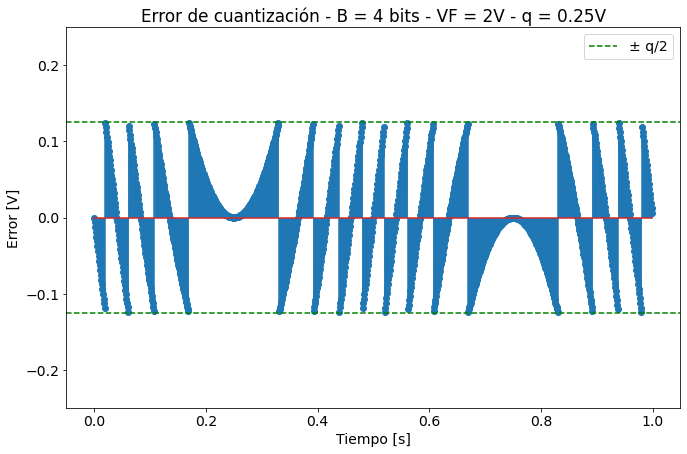

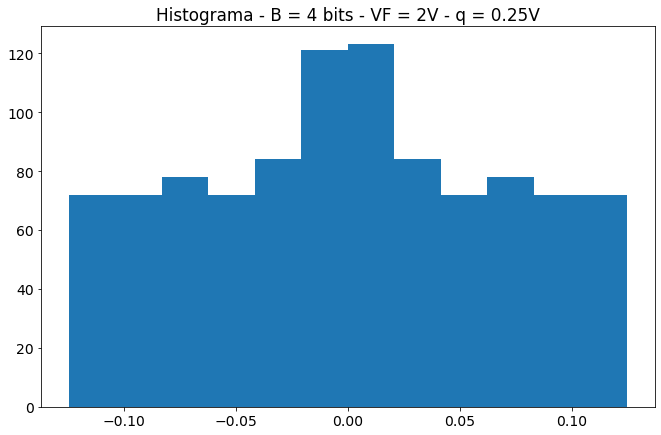

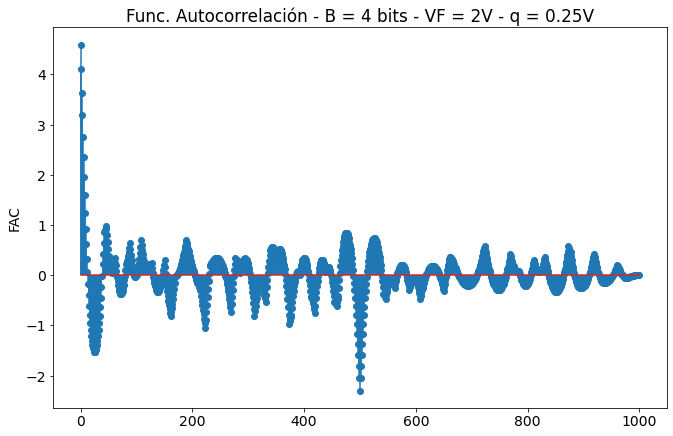

In [25]:
# Generación de la señal de error
se = sq_1 - sr

# Generamos la función autocorrelación del error
se_fac = np.correlate(se, se, mode = 'full')
se_fac = se_fac[se_fac.size // 2 :]

# Calculamos valor medio y varianza
se_mean = np.mean(se)
se_var  = np.var(se)

print("E(N) = {:.3f}V - VAR(N) = (q^2)/12 = ({:.4g}^2)/2 = {:.3f}V^2".format(se_mean, q_1, se_var))

# Graficamos señal de error
plt.figure(4)
plt.stem(tt,se)
plt.axhline(y=-q_1/2, color="green", linestyle='--')
plt.axhline(y=q_1/2, color="green",  linestyle='--')
plt.title('Error de cuantización - B = {} bits - VF = {}V - q = {:.4g}V'.format(B_1,VF_1,q_1))
plt.xlabel('Tiempo [s]')
plt.ylabel('Error [V]')
plt.ylim(-q_1,q_1)
plt.legend(['± q/2'])
plt.show()

# Graficamos histograma para analizar la distribución de la señal de error
plt.figure(5)
plt.hist(se, bins="auto")
plt.title('Histograma - B = {} bits - VF = {}V - q = {:.4g}V'.format(B_1,VF_1,q_1))
plt.show()

# Graficamos función autocorrelación para analizar si es una señal incorrelada
plt.figure(6)
plt.stem(se_fac)
plt.title('Func. Autocorrelación - B = {} bits - VF = {}V - q = {:.4g}V'.format(B_1,VF_1,q_1))
plt.ylabel('FAC')
plt.show()

## 4.2. Análisis de la señal de error (8 bits)

E(N) = 0.000V - VAR(N) = (q^2)/12 = (0.01562^2)/2 = 0.00002V^2


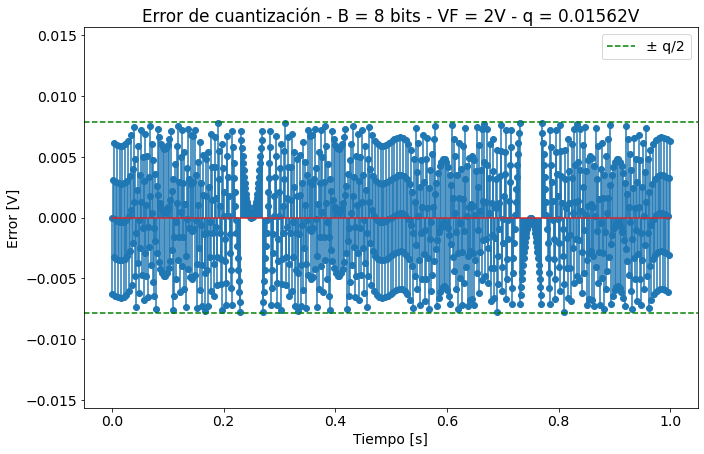

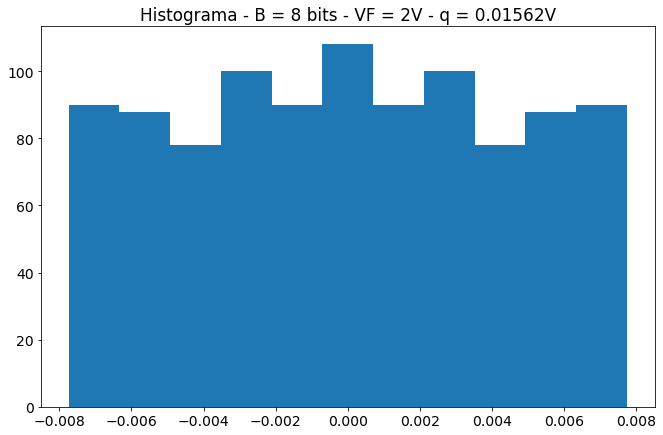

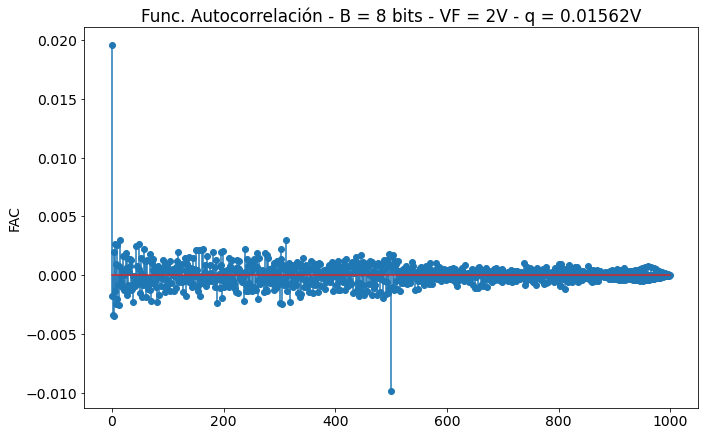

In [26]:
# Generación de la señal de error
se = sq_2 - sr

# Generamos la función autocorrelación del error
se_fac = np.correlate(se, se, mode = 'full')
se_fac = se_fac[se_fac.size // 2 :]

# Calculamos valor medio y varianza
se_mean = np.mean(se)
se_var  = np.var(se)

print("E(N) = {:.3f}V - VAR(N) = (q^2)/12 = ({:.4g}^2)/2 = {:.5f}V^2".format(se_mean, q_2, se_var))

# Graficamos señal de error
plt.figure(7)
plt.stem(tt,se)
plt.axhline(y=-q_2/2, color="green", linestyle='--')
plt.axhline(y=q_2/2, color="green",  linestyle='--')
plt.title('Error de cuantización - B = {} bits - VF = {}V - q = {:.4g}V'.format(B_2,VF_2,q_2))
plt.xlabel('Tiempo [s]')
plt.ylabel('Error [V]')
plt.ylim(-q_2,q_2)
plt.legend(['± q/2'])
plt.show()

# Graficamos histograma para analizar la distribución de la señal de error
plt.figure(8)
plt.hist(se, bins="auto")
plt.title('Histograma - B = {} bits - VF = {}V - q = {:.4g}V'.format(B_2,VF_2,q_2))
plt.show()

# Graficamos función autocorrelación para analizar si es una señal incorrelada
plt.figure(9)
plt.stem(se_fac)
plt.title('Func. Autocorrelación - B = {} bits - VF = {}V - q = {:.4g}V'.format(B_2,VF_2,q_2))
plt.ylabel('FAC')
plt.show()

## 4.3. Análisis de la señal de error (16 bits)

E(N) = 0.000V - VAR(N) = (q^2)/12 = (6.104e-05^2)/2 = 3.099e-10V^2


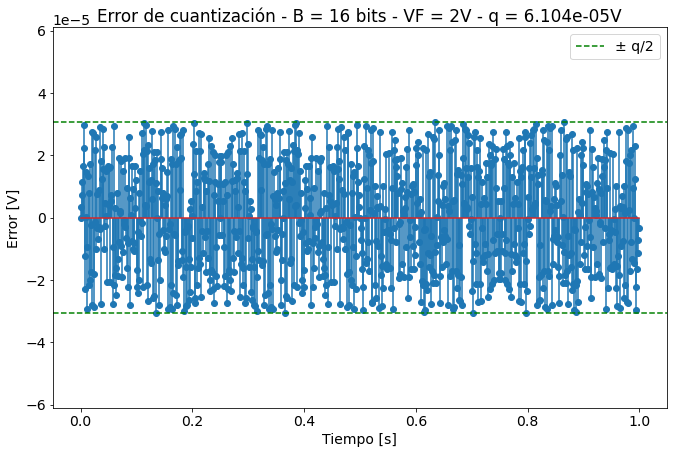

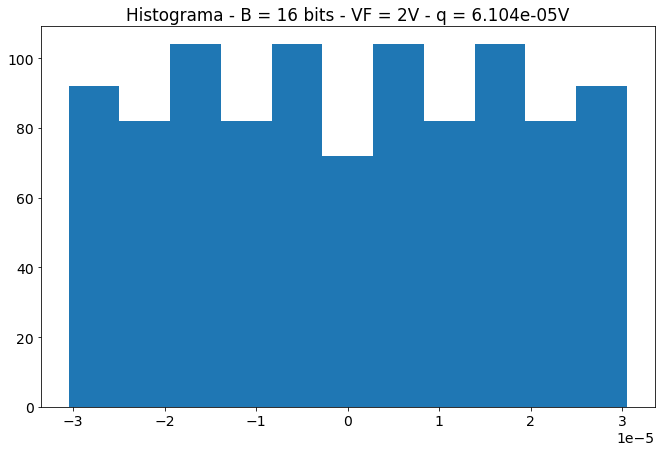

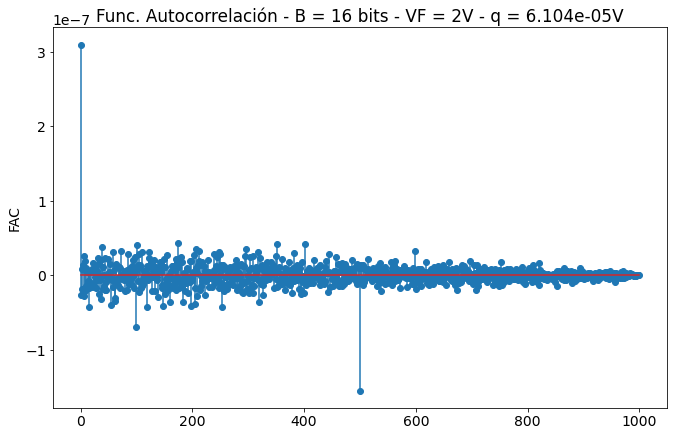

In [27]:
# Generación de la señal de error
se = sq_3 - sr

# Generamos la función autocorrelación del error
se_fac = np.correlate(se, se, mode = 'full')
se_fac = se_fac[se_fac.size // 2 :]

# Calculamos valor medio y varianza
se_mean = np.mean(se)
se_var  = np.var(se)

print("E(N) = {:.3f}V - VAR(N) = (q^2)/12 = ({:.4g}^2)/2 = {:.4g}V^2".format(se_mean, q_3, se_var))

# Graficamos señal de error
plt.figure(10)
plt.stem(tt,se)
plt.axhline(y=-q_3/2, color="green", linestyle='--')
plt.axhline(y=q_3/2, color="green",  linestyle='--')
plt.title('Error de cuantización - B = {} bits - VF = {}V - q = {:.4g}V'.format(B_3,VF_3,q_3))
plt.xlabel('Tiempo [s]')
plt.ylabel('Error [V]')
plt.ylim(-q_3,q_3)
plt.legend(['± q/2'])
plt.show()

# Graficamos histograma para analizar la distribución de la señal de error
plt.figure(11)
plt.hist(se, bins="auto")
plt.title('Histograma - B = {} bits - VF = {}V - q = {:.4g}V'.format(B_3,VF_3,q_3))
plt.show()

# Graficamos función autocorrelación para analizar si es una señal incorrelada
plt.figure(12)
plt.stem(se_fac)
plt.title('Func. Autocorrelación - B = {} bits - VF = {}V - q = {:.4g}V'.format(B_3,VF_3,q_3))
plt.ylabel('FAC')
plt.show()

# 5. Conclusiones
Como puede observarse en los resultados, a medida que se utilizan más bits en el bloque cuantizador es posible representar rango de valores más finos de amplitudes de la señal, obteniendo mayor resolución.

Respecto al análisis estadístico de la señal de error, se observa que el valor medio y la varianza son los esperados acorde los cálculos, pero que la distribución de la señal no es uniforme y tampoco es incorrelada. Esto se debe a que se cuantizó una señal senoidal sintetizada que, a diferencia de una señal analógica real, no tiene ningún tipo de ruido que agregue el componente aleatorio para la incorrelación.